<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Backpropagation Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Implement a 3 input, 4 node hidden-layer, 1 output node Multilayer Perceptron on the following dataset:

| x1 | x2 | x3 | y |
|----|----|----|---|
| 0  | 0  | 1  | 0 |
| 0  | 1  | 1  | 1 |
| 1  | 0  | 1  | 1 |
| 0  | 1  | 0  | 1 |
| 1  | 0  | 0  | 1 |
| 1  | 1  | 1  | 0 |
| 0  | 0  | 0  | 0 |

If you look at the data you'll notice that the first two columns behave like an XOR gate while the last column is mostly just noise. Remember that creating an XOR gate was what the perceptron was criticized for not being able to learn. 

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
data = {'x1': [0,
               0,
               1,
               0,
               1,
               1,
               0,
               1,
              ],
       'x2': [0,
              1,
              0,
              1,
              0,
              1,
              0,
              1,
             ],
       'x3': [1,
              1,
              1,
              0,
              0,
              1,
              1,
              0,
             ],
       'y': [0,
             1,
             1,
             1,
             1,
             0,
             0,
             0,
            ]}   

In [46]:
df = pd.DataFrame.from_dict(data)

In [47]:
df

,x1,x2,x3,y
0,0,0,1,0
1,0,1,1,1
2,1,0,1,1
3,0,1,0,1
4,1,0,0,1
5,1,1,1,0
6,0,0,1,0
7,1,1,0,0


In [48]:
class MLP(object):
    
    def __init__(self, epochs=1000, learning_rate=0.01, n_input=3, n_hidden=4, n_out=1):
        
        # Initialize hyperparameter variables.
        self.epochs = epochs
        self.lr = learning_rate
        self.n_input = n_input
        self.n_hidden = n_hidden
        self.n_out = n_out
    
        # Initialize weights and biases.
        self.hidden_weight = np.random.random(size=(self.n_input + 1, self.n_hidden))
        self.output_weight = np.random.random(size=(self.n_hidden + 1, self.n_out))
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_prime(self, x):
        return x * (1 - x)
    
    def fit(self, X, y):
        self.errors = []
        for _ in range(self.epochs):
            out = self.predict(X)
            self.backpass(X, y, out)
        print(f'Training error at final epoch: {self.errors[-1]}')

    def backpass(self, X, y, out):
        y = y.reshape((y.shape[0], 1))
        error = y - out
        
        self.errors.append(np.sum(error**2))
        # Caluculate adjustment from hidden -> output.
        delta_output = self.sigmoid_prime(out) * error
        
        # Calculate error from input -> hidden.
        output_error = delta_output.dot(self.output_weight[1:].T)
        delta_hidden = output_error * self.sigmoid_prime(out)
        
        #Adjust hidden -> output weghts.

        self.output_weight[1:] += self.activated_hidden.T.dot(delta_output) * self.lr
        self.output_weight[0] = np.sum(delta_output)

        self.hidden_weight[1:] += X.T.dot(delta_hidden) * self.lr
        self.hidden_weight[0] = np.sum(delta_hidden)
    
    def predict(self, X):
        inputs = np.dot(X, self.hidden_weight[1:]) + self.hidden_weight[0]
        self.activated_hidden = self.sigmoid(inputs)
        output = np.dot(self.activated_hidden, self.output_weight[1:]) + self.output_weight[0]
        final = self.sigmoid(output)
        return final
        
    def plot_error(self):
        plt.figure(figsize=(8, 8))
        plt.title('Training Error')
        plt.plot(self.errors)


In [79]:
nn = MLP(epochs=60000, n_hidden=15)

In [80]:
X = df[['x1', 'x2', 'x3']]
y = df['y']

In [81]:
nn.fit(X.values, y.values)

Training error at final epoch: 1.732978501399431


In [82]:
df

,x1,x2,x3,y
0,0,0,1,0
1,0,1,1,1
2,1,0,1,1
3,0,1,0,1
4,1,0,0,1
5,1,1,1,0
6,0,0,1,0
7,1,1,0,0


In [83]:
for x in X.values:
    print(nn.predict(x))

[0.37072923]
[0.34727895]
[0.34239998]
[0.6004258]
[0.61568169]
[0.31965806]
[0.37072923]
[0.46267812]


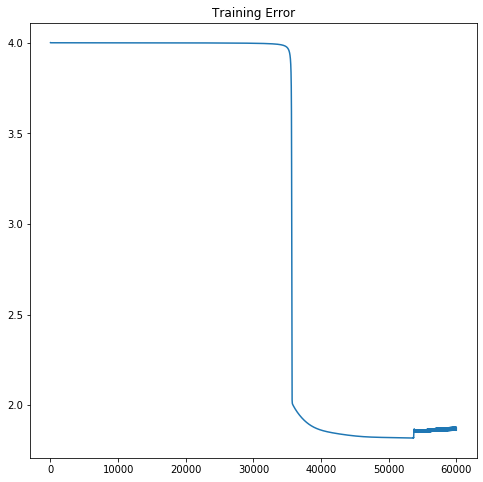

In [78]:
nn.plot_error()

## Try building/training a more complex MLP on a bigger dataset.

Use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) to build the cannonical handwriting digit recognizer and see what kind of accuracy you can achieve. 

If you need inspiration, the internet is chalk-full of tutorials, but I want you to see how far you can get on your own first. I've linked to the original MNIST dataset above but it will probably be easier to download data through a neural network library. If you reference outside resources make sure you understand every line of code that you're using from other sources, and share with your fellow students helpful resources that you find.


In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import fetch_openml


In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255


In [3]:
digits = 10
examples = y.shape[0]

y = y.reshape(1, examples)

Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)

m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:, :m], Y_new[:, m:]

shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((784, 60000), (784, 10000), (10, 60000), (10, 10000))

In [4]:
def show(image, label):
    plt.imshow(image.reshape(28, 28), cmap = matplotlib.cm.binary)
    plt.axis('off')
    plt.show()
    print(label)

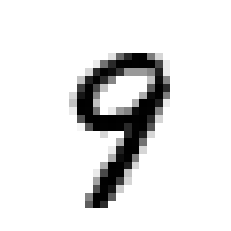

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [5]:
i = 12
show(X_train[:,i].reshape(1, -1), Y_train[:,i])

In [ ]:
def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L


In [ ]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s


In [ ]:
n_x = X_train.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X = X_train
Y = Y_train

for i in range(2000):

    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_multiclass_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)


In [ ]:
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))


In [6]:
class NNImage(object):
    """Classifier for the classic MNIST handwritten numbers dataset.
    
    Instantiate an instance with desired hyperparameters:    
    model = NNImage(batch_size=32)
    
    X must be an array of flattened 28x28 pixel 8bit grayscale images.
    
    y must be an array of integer labels.
    
    Train model by calling model.fit(X, y)
    
    Call model.predict(X) to get a prediction on a new image.
    
    Call model.plot() to plot loss per epoch.
    
    :param epochs: int Number of training iterations Default = 2000
    :param batch_size: int Number of training examples per training iteration
        Default = None == full dataset is run per each trainint iteratin.
    :param learning_rate: float Step size to adjust weights and biases per iteration.
    :param n_hidden: int Number of nodes in hidden layer. Default = 128
    
    
    """
    def __init__(self, epochs=1000, batch_size=None, learning_rate=1, n_hidden=128):
        self.lr = learning_rate
        self.epochs = epochs
        self.m = None
        self.batch_size = batch_size
        self.losses = []
        
        # Initialize hidden layer.
        self.hidden_weight = np.random.randn(n_hidden, 784)
        self.hidden_bias = np.zeros((n_hidden, 1))
        
        # Initialize ouput layer.
        self.output_weight = np.random.randn(10, n_hidden)
        self.output_bias = np.zeros((10, 1))
        
    
    def sigmoid(self, x):
        """Sigmoid activation fuction"""
        
        return 1 / (1 + np.exp(-x))

    def loss(self, y, yhat):
        """Multiclass loss."""
        
        # Sum the log loss.
        loss_sum = np.sum(np.multiply(y, np.log(yhat)))
        # And average over all training examples.
        m = y.shape[1]
        return -(1 / m) * loss_sum
    
    def fit(self, X, y):
        """Train the model"""
        
        for i in range(1, self.epochs + 1):
            # Generate random subset if batch_size specified.
            if self.batch_size:
                X = np.random.permutation(X)[:,range(self.batch_size)]
                y = np.random.permutation(y)[:,range(self.batch_size)]
            
            # One training iteration.
            self.m = X.shape[1]
            p = self.predict(X)
            loss = self.backpass(X, y, p)
            
            # Print and record loss for every 100 iterations.
            if i % 100 == 0:
                self.losses.append(loss)
                print(f'Loss at epoch {i}: {loss}')
   
    def predict(self, X):
        """Forward pass of network."""
        
        # Apply  hidden layer's weights and bias to features.
        self.hidden_output = np.matmul(self.hidden_weight, X) + self.hidden_bias
        # Apply sigmoid activaton
        self.activated_hidden = self.sigmoid(self.hidden_output)
        
        # Apply output layer's weights and bias to hidden layer output.
        output_output = np.matmul(self.output_weight, self.activated_hidden) + self.output_bias
        # Apply softmax activation.
        activated_output = np.exp(output_output) / np.sum(np.exp(output_output), axis=0)

        return activated_output
    
    def backpass(self, X, y, out):
        """Backpropogation algorithm"""
        
        # TODO: Add optimizer.
        loss = self.loss(y, out)
        
        # Calculate error.
        delta_output = out - y
        # Calculate gradients for output layer weights and biases
        delta_output_weight = (1. / self.m) * np.matmul(delta_output, self.activated_hidden.T)
        delta_output_bias = (1. / self.m) * np.sum(delta_output, axis=1, keepdims=True)
        
        # Weighted sum of errors.
        delta_activation = np.matmul(self.output_weight.T, delta_output)
        # Apply weighted sum to derivative of sigmoid activation.
        delta_hidden = delta_activation * self.sigmoid(self.hidden_output) * (1 - self.sigmoid(self.hidden_output))
        
        # Caluculate gradients for output layer weights and bias
        delta_hidden_weight = (1. / self.m) * np.matmul(delta_hidden, X.T)
        delta_hidden_bias = (1. / self.m) * np.sum(delta_hidden, axis=1, keepdims=True)
        
        # Update weights and biases.
        self.output_weight -= self.lr * delta_output_weight
        self.output_bias -= self.lr * delta_output_bias

        self.hidden_weight -= self.lr * delta_hidden_weight
        self.hidden_bias -= self.lr * delta_hidden_bias
        
        # Return loss for plotting.
        return loss
    
    def plot(self):
        """Plot the loss per 100 epochs"""
        
        plt.figure(figsize=(10, 10))
        plt.title('Loss by epoch.')
        plt.xlabel('Epochs / 100')
        plt.ylabel('Cross Entropy')
        plt.plot(self.losses)
        plt.show()
        

In [7]:
nni = NNImage(epochs=1000, batch_size=None, learning_rate=1, n_hidden=32)


In [8]:
nni.fit(X_train, Y_train)

Loss at epoch 100: 0.89625560182324
Loss at epoch 200: 0.6759436020697147
Loss at epoch 300: 0.5775186828669966
Loss at epoch 400: 0.5170649927575115
Loss at epoch 500: 0.47524290823155474
Loss at epoch 600: 0.4443234701463376
Loss at epoch 700: 0.42026007614805366
Loss at epoch 800: 0.4007108295079609
Loss at epoch 900: 0.3843162822928971
Loss at epoch 1000: 0.3702498819675706


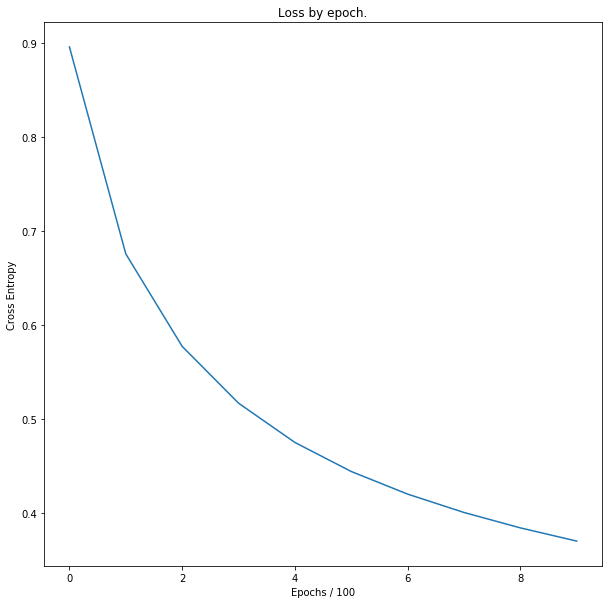

In [9]:
nni.plot()

In [29]:
def nice_confusion(y_true, y_pred):
    return sns.heatmap(confusion_matrix(y_true, y_pred),
                       annot=True,
                       fmt='d',
                       cmap='copper_r')


              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1020
           1       0.97      0.97      0.97      1139
           2       0.88      0.89      0.88      1021
           3       0.87      0.86      0.87      1021
           4       0.91      0.89      0.90      1003
           5       0.84      0.84      0.84       893
           6       0.91      0.90      0.90       961
           7       0.87      0.91      0.89       988
           8       0.82      0.85      0.84       936
           9       0.87      0.86      0.86      1018

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



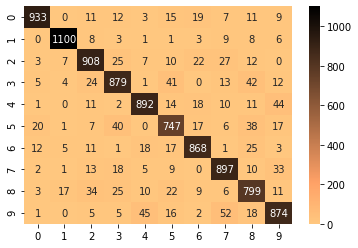

In [30]:
predictions = np.argmax(nni.predict(X_test), axis=0)
labels = np.argmax(Y_test, axis=0)
nice_confusion(predictions, labels)
print(classification_report(predictions, labels))

The code below doesn't work. It is left for posterity.

In [444]:
class MLPImage(object):
    
    def __init__(self, epochs=1000, learning_rate=0.001, n_input=784, n_hidden=128, n_out=10):
        
        # Initialize hyperparameter variables.
        self.epochs = epochs
        self.lr = learning_rate
        self.n_input = n_input
        self.n_hidden = n_hidden
        self.n_out = n_out
    
        # Initialize weights and biases.
        self.hidden_weight = np.random.random(size=(self.n_input + 1, self.n_hidden))
        self.output_weight = np.random.random(size=(self.n_hidden + 1, self.n_out))
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_prime(self, x):
        return x * (1 - x)

    def softmax(self, inputs):
        inputs = inputs.flatten()
        return np.exp(inputs) / float(sum(np.exp(inputs)))
    
    def cross_entropy(self, X, y):
        """
        X is the output from fully connected layer (num_examples x num_classes)
        y is labels (num_examples x 1)
            Note that y is not one-hot encoded vector. 
            It can be computed as y.argmax(axis=1) from one-hot encoded vectors of labels if required.
        """
        m = y.shape[0]
        p = self.softmax(X).reshape((28, 28))
        # We use multidimensional array indexing to extract 
        # softmax probability of the correct label for each sample.
        # Refer to https://docs.scipy.org/doc/numpy/user/basics.indexing.html#indexing-multi-dimensional-arrays for understanding multidimensional array indexing.
        log_likelihood = -np.log(p[range(m), y])
        print(f'cross m {m}, X {log_likelihood.shape}')
        loss = np.sum(log_likelihood) / m
        return loss

    def delta_cross_entropy(self, X, y):
        """
        X is the output from fully connected layer (num_examples x num_classes)
        y is labels (num_examples x 1)
            Note that y is not one-hot encoded vector. 
            It can be computed as y.argmax(axis=1) from one-hot encoded vectors of labels if required.
        """
        m = y.shape[0]
        grad = self.softmax(X).reshape(1, -1)
        print(f'grad {grad.shape}, y {y}')
        grad[:, y] -= 1
        grad = grad/m
        return grad.reshape(- )

    def fit(self, X, y):
        self.errors = []
        for _ in range(self.epochs):
            for image, label in zip(X, y):
                image = image.flatten() / 255
                out = self.predict(image)
                self.backpass(image, label, out)
        print(f'Training error at final epoch: {self.errors[-1]}')

    def backpass(self, X, y, out):
        label = np.zeros((10, 1), dtype=np.int8)
        print(f'back {label}')
        label[y][0] = 1
        error = self.cross_entropy(X, label)        
        
        self.errors.append(error)
        # Caluculate adjustment from hidden -> output.
        delta_output = error * self.delta_cross_entropy(X, label)
        
        # Calculate error from input -> hidden.
        output_error = delta_output.dot(self.output_weight[1:].T)
        delta_hidden = output_error * self.sigmoid_prime(self.activated_hidden)
        
        #Adjust hidden -> output weghts.
        self.output_weight[1:] += self.activated_hidden.T.dot(delta_output) * self.lr
        self.output_weight[0] = np.sum(delta_output)

        self.hidden_weight[1:] += X.T.dot(delta_hidden) * self.lr
        self.hidden_weight[0] = np.sum(delta_hidden)
    
    def predict(self, X):
        inputs = np.dot(X, self.hidden_weight[1:]) + self.hidden_weight[0]
        self.activated_hidden = self.sigmoid(inputs)
        output = np.dot(self.activated_hidden, self.output_weight[1:]) + self.output_weight[0]
        pred = self.softmax(output)
        final = np.argmax(pred)
        print(f'pred {pred.shape}, {final}')
        return pred
        
    def plot_error(self):
        plt.figure(figsize=(8, 8))
        plt.title('Training Error')
        plt.plot(self.errors)


In [445]:
nnimage = MLPImage()

In [446]:
nnimage.fit(x_train[:10000], y_train[:10000])

pred (10,), 8
back [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
cross m 10, X (10, 10)
grad (1, 784), y [[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]]


ValueError: shapes (784,1) and (10,128) not aligned: 1 (dim 1) != 10 (dim 0)

## Stretch Goals: 

- Implement Cross Validation model evaluation on your MNIST implementation 
- Research different [Gradient Descent Based Optimizers](https://keras.io/optimizers/)
 - [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)
- Build a housing price estimation model using a neural network. How does its accuracy compare with the regression models that we fit earlier on in class?